In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploratory Data Analysis

In [2]:
# reading data
df = pd.read_csv('train.csv')
print("Number of rows: ",df.shape[0])
df.head()

Number of rows:  404290


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


We have the following columns

* id: A unique id for the question pair
* qid1: id of the first question.
* qid2: id of the second question
* question1: the first question
* question2: second question
* is_duplicate: Whether both are duplicate or not.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [5]:
# Fill nans

df.fillna('',inplace=True)

In [6]:
# duplicate rows
df.duplicated().sum()

0

# Analyzing distribution of target variable

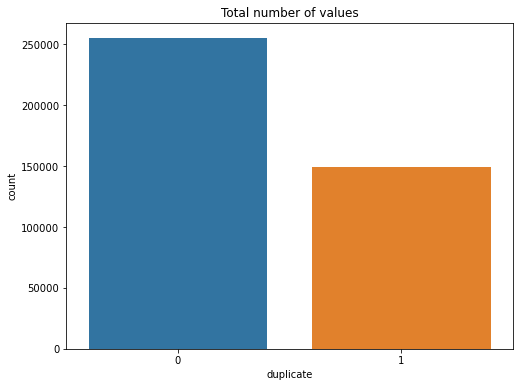

Total number of question pairs is 404290
Question pairs that are similar is 149263 which is 37 % of total
Question pairs that are not similar is 255027 which is 63 % of total


In [7]:
plt.figure(figsize=(8,6))
ct = df['is_duplicate'].value_counts()
sns.barplot(x=ct.index,y=ct.values)
plt.title('Total number of values')
plt.xlabel('duplicate')
plt.ylabel('count')
plt.show()

print('Total number of question pairs is {}'.format(len(df.id.values)))
print('Question pairs that are similar is {} which is {} % of total'.format(ct[1],round((ct[1]/(ct[1]+ct[0])*100)),2))
print('Question pairs that are not similar is {} which is {} % of total'.format(ct[0],round((ct[0]/(ct[1]+ct[0])*100)),2))

In [8]:
# Number of unique questions

qids = pd.Series(list(df.qid1)+list(df.qid2))
unique_qs = len(np.unique(qids))
qs_more_than_once = np.sum(qids.value_counts()>1)
highest_freq_q = np.max(qids.value_counts())

print('Total number of unique questions: ',unique_qs)
print('Number of questions that appear more than once: ',qs_more_than_once)
print('Max number of times a question repeated: ',highest_freq_q)

Total number of unique questions:  537933
Number of questions that appear more than once:  111780
Max number of times a question repeated:  157


C:\Users\krith\AppData\Local\Temp/ipykernel_19676/3642567179.py:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


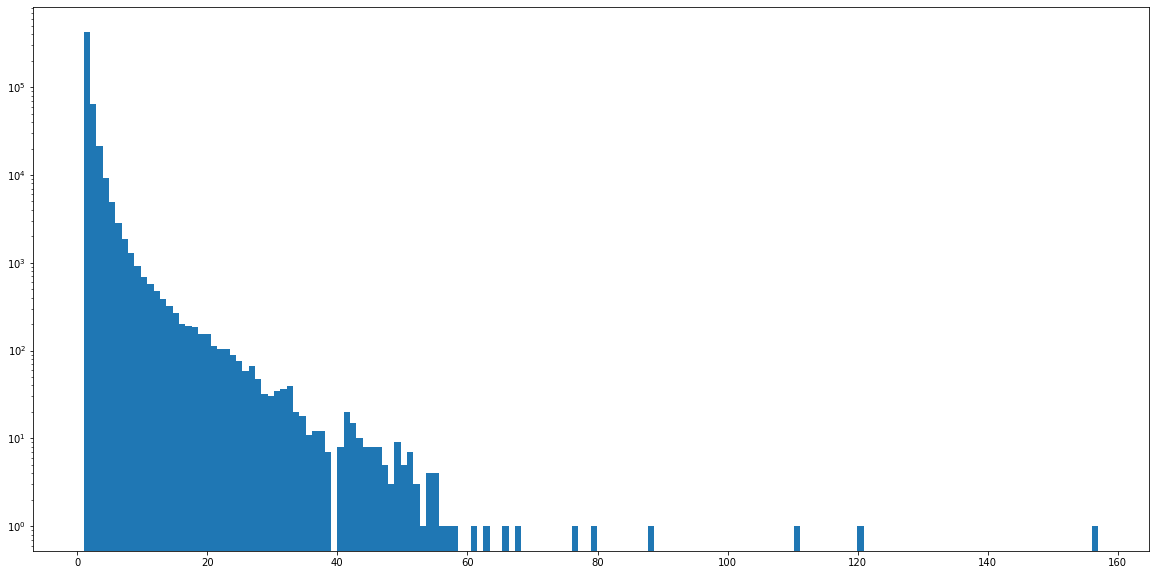

In [9]:
# Frequency of each question

plt.figure(figsize=(20,10))
plt.yscale('log', nonposy='clip')
plt.hist(qids.value_counts(),bins=160)
plt.show()

In [10]:
new_df = df.sample(30000)

In [12]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
306348,How can l learn guitar? What are some good tip...,How do I learn playing a guitar easily?
126434,Are there alternatives to adsense?,Alternatives to AdSense?
231940,How do I setup a proxy server in Ubuntu?,How do I setup DC++ on a proxy server?
119095,How does a CPU unit work?,How CPU work in general?
327564,How risky is chemical engineering job in India?,How risky is a chemical engineering job?


### Bag of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [14]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [15]:

temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
306348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:

temp_df['is_duplicate'] = new_df['is_duplicate']

In [17]:

temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
306348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
126434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
231940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
327564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7405

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7223333333333334